In [1]:
## Notbook for code constructing graphic elements from the ball park data set

## For reference https://i.redd.it/iwig3dqhrp5a1.jpg

## Create Icon Set and dictionary for map

BASE_DIR = 'data\images\icons\base'
OUTPUT_PATH = 'data\images\icons\base\TEMP'

In [13]:
import os
import logging
from PIL import Image
import webcolors
import json

# Set up logging
logging.basicConfig(filename='image_processing.log', level=logging.DEBUG)

def process_images(base_dir, color_palette, color_names):
    try:
        # Create output directory if it doesn't exist
        output_dir = os.path.join(base_dir, 'TEMP')
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Get list of image files in the base directory
        image_files = [f for f in os.listdir(base_dir) if f.endswith('.png') or f.endswith('.jpg')]

        file_dict = {}  # Dictionary to store the file paths

        for filename in image_files:
            try:
                icon_name = os.path.splitext(filename)[0]  # Get the icon name without the extension
                icon_variations = {}  # Dictionary to store color variations of the icon

                # Open the image
                image_path = os.path.join(base_dir, filename)
                image = Image.open(image_path)

                # Convert to RGBA if the image has no alpha channel
                if image.mode != 'RGBA':
                    image = image.convert('RGBA')

                # Create a new image for each color in the palette
                for i, color_code in enumerate(color_palette):
                    # Create a copy of the original image
                    colored_image = image.copy()

                    # Get the RGB values for the color code
                    rgb_values = tuple(int(color_code[i:i+2], 16) for i in (0, 2, 4))

                    # Apply the color to each pixel
                    colored_pixels = colored_image.load()
                    for x in range(colored_image.width):
                        for y in range(colored_image.height):
                            pixel = colored_pixels[x, y]
                            if pixel[3] > 0:  # Non-transparent pixel
                                colored_pixels[x, y] = rgb_values + (pixel[3],)

                    # Save the colored image
                    colored_filename = icon_name + '_' + color_names[i] + '.png'
                    colored_filepath = os.path.join(output_dir, colored_filename)
                    colored_image.save(colored_filepath)

                    # Store the color variation in the dictionary
                    icon_variations[color_names[i]] = colored_filepath

                # Store the icon and its color variations in the file dictionary
                file_dict[icon_name] = icon_variations

                logging.info(f"Processed image: {filename}")
            except Exception as e:
                logging.error(f"Error processing image: {filename}\n{str(e)}")

        # Convert the file dictionary to JSON
        json_data = json.dumps(file_dict, indent=4)

        # Check JSON date
        print(json_data)
        # Save json in output directory
        json_filepath = os.path.join(output_dir, 'icons.json')
        with open(json_filepath, 'w') as f:
            f.write(json_data)



        
    except Exception as e:
        logging.error(f"Error processing images in directory: {base_dir}\n{str(e)}")


# Define the base directory, color palette, and color names
base_directory = 'data/images/icons/base'
color_palette = ["df2935", "6369d1", "172121", "f4fff8", "9cf6f6"]
color_names = ['red', 'blue', 'black', 'light', 'lt_blue']

# Process the images and generate JSON
process_images(base_directory, color_palette, color_names)


{
    "infield": {
        "red": "data/images/icons/base\\TEMP\\infield_red.png",
        "blue": "data/images/icons/base\\TEMP\\infield_blue.png",
        "black": "data/images/icons/base\\TEMP\\infield_black.png",
        "light": "data/images/icons/base\\TEMP\\infield_light.png",
        "lt_blue": "data/images/icons/base\\TEMP\\infield_lt_blue.png"
    },
    "infield2": {
        "red": "data/images/icons/base\\TEMP\\infield2_red.png",
        "blue": "data/images/icons/base\\TEMP\\infield2_blue.png",
        "black": "data/images/icons/base\\TEMP\\infield2_black.png",
        "light": "data/images/icons/base\\TEMP\\infield2_light.png",
        "lt_blue": "data/images/icons/base\\TEMP\\infield2_lt_blue.png"
    },
    "plate_empty": {
        "red": "data/images/icons/base\\TEMP\\plate_empty_red.png",
        "blue": "data/images/icons/base\\TEMP\\plate_empty_blue.png",
        "black": "data/images/icons/base\\TEMP\\plate_empty_black.png",
        "light": "data/images/icons/bas

In [7]:
import os
import logging
from PIL import Image
import webcolors

# Set up logging
logging.basicConfig(filename='image_processing.log', level=logging.DEBUG)

def process_images(base_dir, color_palette, color_names):
    try:
        # Create output directory if it doesn't exist
        output_dir = os.path.join(base_dir, 'processed')
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Get list of image files in the base directory
        image_files = [f for f in os.listdir(base_dir) if f.endswith('.png') or f.endswith('.jpg')]

        for filename in image_files:
            try:
                # Open the image
                image_path = os.path.join(base_dir, filename)
                image = Image.open(image_path)

                # Convert to RGBA if the image has no alpha channel
                if image.mode != 'RGBA':
                    image = image.convert('RGBA')

                # Create a new image for each color in the palette
                for i, color_code in enumerate(color_palette):
                    # Create a copy of the original image
                    colored_image = image.copy()

                    # Get the RGB values for the color code
                    rgb_values = tuple(int(color_code[i:i+2], 16) for i in (0, 2, 4))

                    # Apply the color to each pixel
                    colored_pixels = colored_image.load()
                    for x in range(colored_image.width):
                        for y in range(colored_image.height):
                            pixel = colored_pixels[x, y]
                            if pixel[3] > 0:  # Non-transparent pixel
                                colored_pixels[x, y] = rgb_values + (pixel[3],)

                    # Save the colored image
                    colored_filename = os.path.splitext(filename)[0] + '_' + color_names[i] + '.png'
                    colored_image.save(os.path.join(output_dir, colored_filename))

                logging.info(f"Processed image: {filename}")
            except Exception as e:
                logging.error(f"Error processing image: {filename}\n{str(e)}")

    except Exception as e:
        logging.error(f"Error processing images in directory: {base_dir}\n{str(e)}")

### Function to create a json file of the image names, colors and paths


# Define the base directory, color palette, and color names
base_directory = 'data/images/icons/base'
color_palette = ["df2935", "6369d1", "172121", "f4fff8", "9cf6f6"]
color_names = ['red', 'blue', 'black', 'light', 'lt_blue']

# Process the images
process_images(base_directory, color_palette[:len(color_names)], color_names)




['data/images/icons\\base\\infield.png', 'data/images/icons\\base\\infield2.png', 'data/images/icons\\base\\plate_empty.png', 'data/images/icons\\base\\plate_full.png', 'data/images/icons\\base\\stadium.png', 'data/images/icons\\baseball\\baseball_light.png', 'data/images/icons\\baseball\\emblem.png', 'data/images/icons\\baseball\\park_green.png']


This code sets up the data loading and a color-blind friendly color palette from the ColorBrewer library. The 'Set3' palette is chosen as it contains bold colors that work well on a dark background. You can adjust the number inside the brackets to get a different number of colors. The colors are then converted to RGB format, which is required by matplotlib.

In [2]:
##### Dependencies and Data Loading
import os
from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Rotation as R

In [1]:
##### Dependencies and Data Loading
import os


#####SOURCE FILE######
json_path = 'data\default_updated_output.json'


import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import colorbrewer

# Load JSON data
with open(json_path, "r") as file:
    data = json.load(file)


# Create a color-blind friendly color palette
colors = colorbrewer.Set3[7]  # Change the number to get a different number of colors
colors_rgb = [tuple(np.array(color) / 255) for color in colors]  # Convert to RGB format

# Set the style of the plot
plt.style.use('dark_background')


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely import affinity


def create_geodataframe(data):
    df = pd.DataFrame(data)
    gdf = gpd.GeoDataFrame(df, geometry=[Polygon(fop) for fop in df['fop']])
    gdf['foul_polygon'] = [Polygon(foul) for foul in df['foul']]
    return gdf


def merge_polygons(gdf):
    gdf['merged'] = [fop.union(foul) for fop, foul in zip(gdf['geometry'], gdf['foul_polygon'])]
    return gdf


def rotate_geometries(gdf, angle):
    rotated_gdf = gdf.copy()
    angle_rad = np.radians(angle)

    for idx, row in gdf.iterrows():
        # Rotate fop geometry
        fop_centroid = row['geometry'].centroid
        rotated_fop = affinity.rotate(row['geometry'], angle_rad, origin=fop_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_geometry'] = rotated_fop

        # Rotate foul geometry
        foul_centroid = row['foul_polygon'].centroid
        rotated_foul = affinity.rotate(row['foul_polygon'], angle_rad, origin=foul_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_foul'] = rotated_foul

        # Rotate merged geometry
        merged_centroid = row['merged'].centroid
        rotated_merged = affinity.rotate(row['merged'], angle_rad, origin=merged_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_merged'] = rotated_merged

    return rotated_gdf


def plot_rotated_fields(sample_data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

    for idx, (record_id, record) in enumerate(sample_data.iterrows()):
        row = idx // cols
        col = idx % cols

        # Calculate the angle needed to rotate the field to 0 degrees orientation
        angle_to_rotate = 0 - record['field_orientation']

        # Rotate both fop and foul polygons using the merged centroid as the common rotation point
        merged_centroid = record['merged'].centroid
        rotated_fop = affinity.rotate(record['geometry'], angle_to_rotate, origin=merged_centroid)
        rotated_foul = affinity.rotate(record['foul_polygon'], angle_to_rotate, origin=merged_centroid)

        # Plot the rotated fop and foul polygons with only outlines
        gpd.GeoSeries([rotated_fop]).plot(ax=axes[row, col], edgecolor='blue', facecolor='none')
        gpd.GeoSeries([rotated_foul]).plot(ax=axes[row, col], edgecolor='red', facecolor='none')
        axes[row, col].set_title(f'Rotated FOP and Foul {record["park_name"]}')

    plt.tight_layout()
    plt.show()




In [3]:
### Plot fields in their original orientation

import pandas as pd
import matplotlib.pyplot as plt

# Define a function to plot foul and fop fields
def plot_fields(data, index):
    # Extract foul and fop fields from the data
    foul_field = data.loc[index, 'foul']
    fop_field = data.loc[index, 'fop']

    # Create lists for x and y coordinates
    foul_x, foul_y = zip(*foul_field)
    fop_x, fop_y = zip(*fop_field)

    # Plot the fields
    plt.plot(foul_x, foul_y, label='Foul Field')
    plt.plot(fop_x, fop_y, label='Fop Field')
    plt.legend()
    plt.title(data.loc[index, 'park_name'])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Plot the first 5 fields in the data
for i in range(5):
    plot_fields(data, i)


AttributeError: 'list' object has no attribute 'loc'

c:\Users\Justin\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


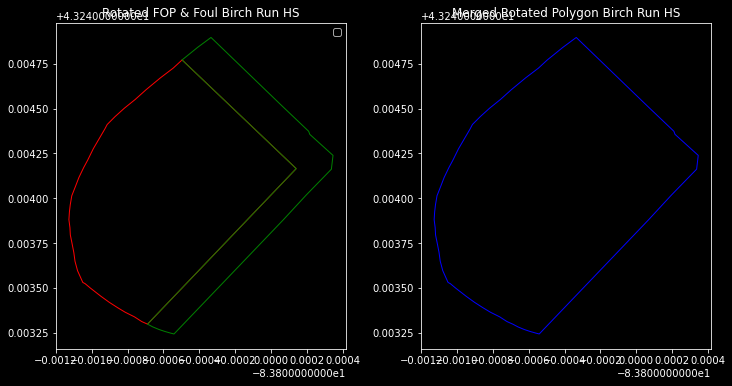

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


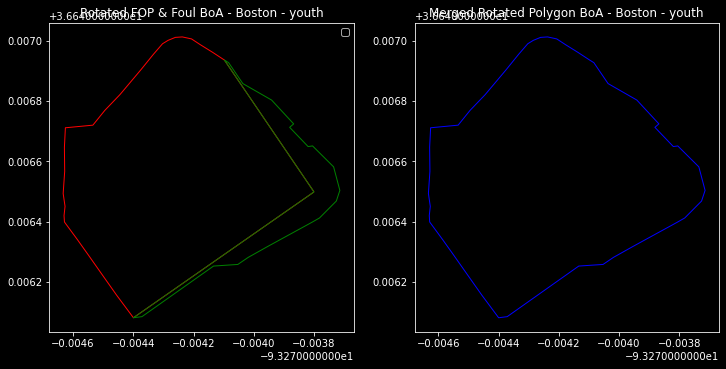

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


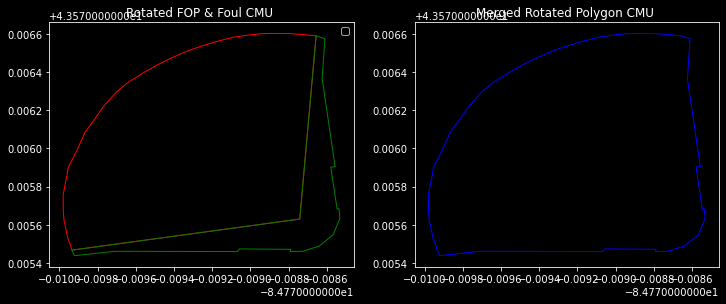

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


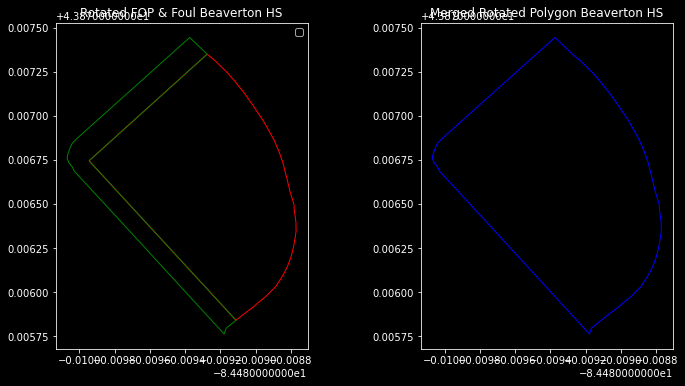

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


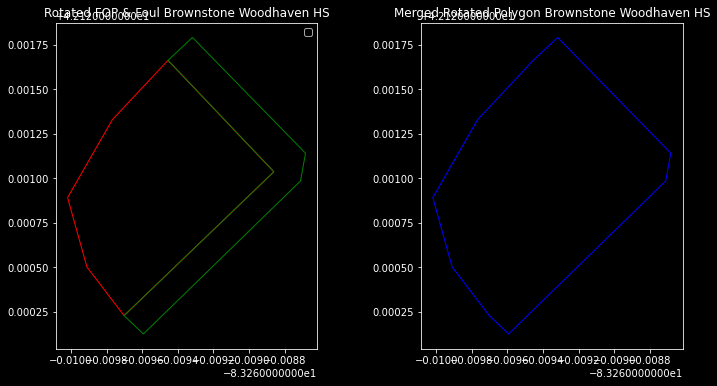

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


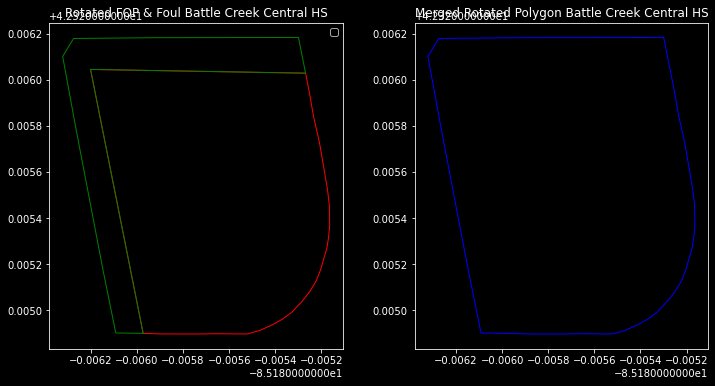

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


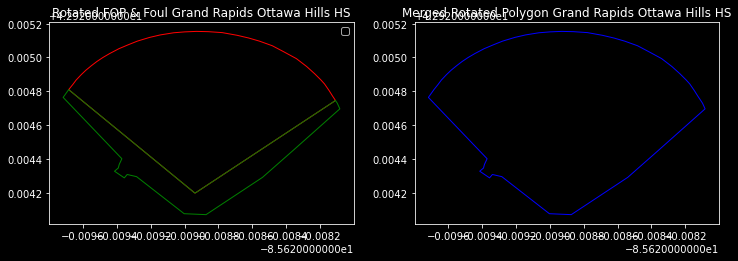

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


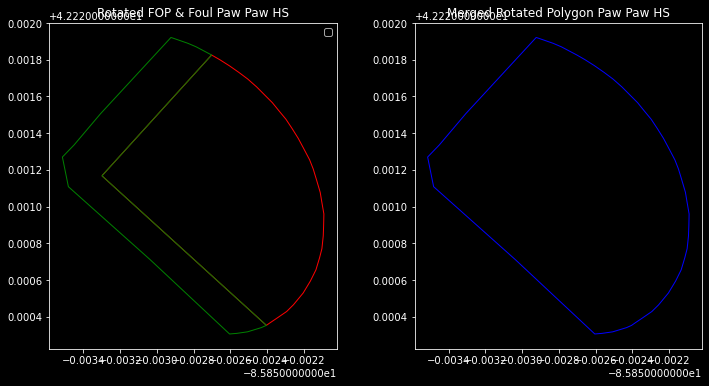

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


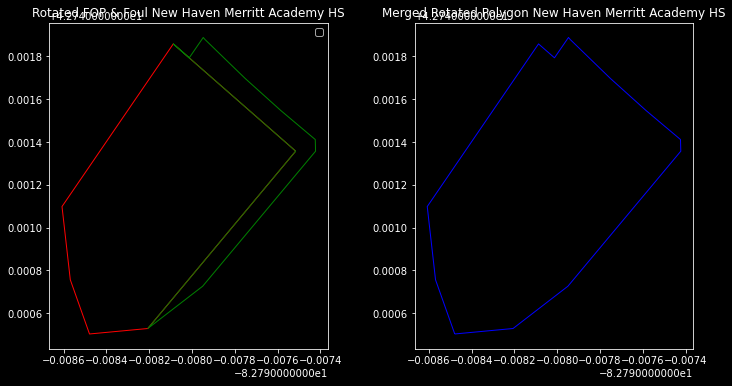

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


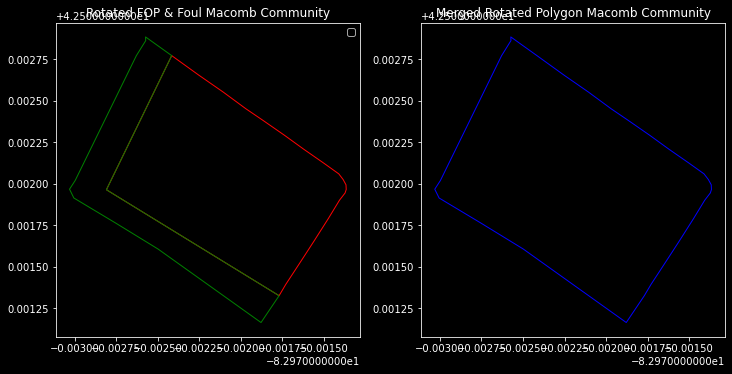

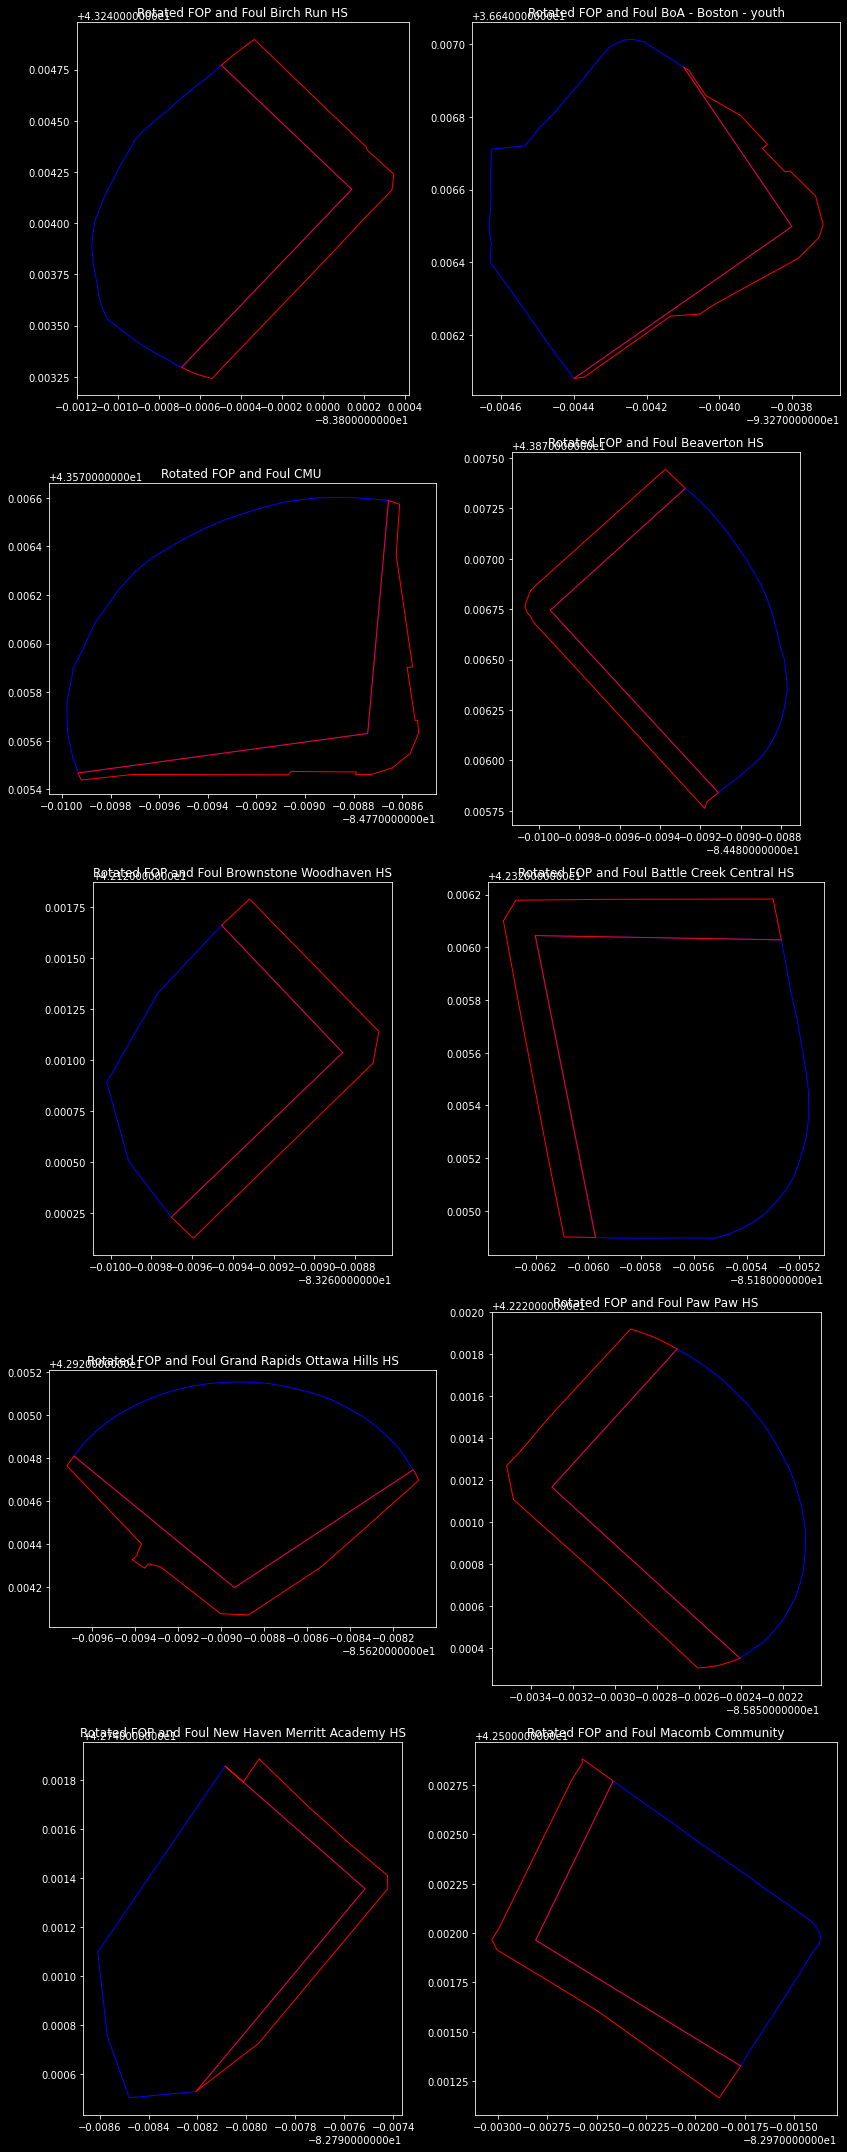

In [5]:
###### Run the code ######

# Create a GeoDataFrame
gdf = create_geodataframe(data)

# Merge the polygons
gdf = merge_polygons(gdf)

# Sample 10 random records
sample_records = gdf.sample(10)

# Plot the rotated polygons
for idx, record in sample_records.iterrows():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Calculate the angle needed to rotate the field to 0 degrees orientation
    angle_to_rotate = 0 - record['field_orientation']

    # Rotate both fop and foul polygons using the merged centroid as the common rotation point
    merged_centroid = record['merged'].centroid
    rotated_fop = affinity.rotate(record['geometry'], angle_to_rotate, origin=merged_centroid)
    rotated_foul = affinity.rotate(record['foul_polygon'], angle_to_rotate, origin=merged_centroid)

    # Plot the rotated fop and foul polygons with only outlines
    gpd.GeoSeries([rotated_fop]).plot(ax=axes[0], edgecolor='red', facecolor='none', label="FOP")
    gpd.GeoSeries([rotated_foul]).plot(ax=axes[0], edgecolor='green', facecolor='none', label="Foul")
    axes[0].set_title(f'Rotated FOP & Foul {record["park_name"]}')
    axes[0].legend()

    # Plot the merged rotated polygon
    rotated_merged = affinity.rotate(record['merged'], angle_to_rotate, origin=merged_centroid)
    gpd.GeoSeries([rotated_merged]).plot(ax=axes[1], edgecolor='blue', facecolor='none')
    axes[1].set_title(f'Merged Rotated Polygon {record["park_name"]}')

    plt.show()

# Plot rotated fields for the 10 sample records
rows = 5
cols = 2
plot_rotated_fields(sample_records, rows, cols)



In [ ]:
###### Setting up the functions #####

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point
from shapely import affinity


def create_geodataframe(data):
    df = pd.DataFrame(data)
    gdf = gpd.GeoDataFrame(df, geometry=[Polygon(fop) for fop in df['fop']])
    gdf['foul_polygon'] = [Polygon(foul) for foul in df['foul']]
    return gdf

# Function to merge 'fop' and 'foul' polygons into a single object
def merge_polygons(gdf):
    gdf['merged'] = [fop.union(foul) for fop, foul in zip(gdf['geometry'], gdf['foul_polygon'])]
    return gdf

def rotate_geometries(gdf, angle):
    rotated_gdf = gdf.copy()
    angle_rad = np.radians(angle)
    
    for idx, row in gdf.iterrows():
        # Rotate fop geometry
        fop_centroid = row['geometry'].centroid
        rotated_fop = affinity.rotate(row['geometry'], angle_rad, origin=fop_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_geometry'] = rotated_fop
        
        # Rotate foul geometry
        foul_centroid = row['foul_polygon'].centroid
        rotated_foul = affinity.rotate(row['foul_polygon'], angle_rad, origin=foul_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_foul'] = rotated_foul
        
        # Rotate merged geometry
        merged_centroid = row['merged'].centroid
        rotated_merged = affinity.rotate(row['merged'], angle_rad, origin=merged_centroid, use_radians=True)
        rotated_gdf.at[idx, 'rotated_merged'] = rotated_merged
        
    return rotated_gdf

def plot_rotated_fields(sample_data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6*rows))
    
    for idx, (record_id, record) in enumerate(sample_data.iterrows()):
        row = idx // cols
        col = idx % cols

        # Calculate the angle needed to rotate the field to 0 degrees orientation
        angle_to_rotate = 0 - record['field_orientation']

        # Rotate both fop and foul polygons using the merged centroid as the common rotation point
        merged_centroid = record['merged'].centroid
        rotated_fop = affinity.rotate(record['geometry'], angle_to_rotate, origin=merged_centroid)
        rotated_foul = affinity.rotate(record['foul_polygon'], angle_to_rotate, origin=merged_centroid)

        # Plot the rotated fop and foul polygons with only outlines
        gpd.GeoSeries([rotated_fop]).plot(ax=axes[row, col], edgecolor='blue', facecolor='none')
        gpd.GeoSeries([rotated_foul]).plot(ax=axes[row, col], edgecolor='red', facecolor='none')
        axes[row, col].set_title(f'Rotated FOP and Foul {record["park_name"]}')
    
    plt.tight_layout()
    plt.show()


from shapely.ops import transform
from functools import partial
import pyproj

from shapely.ops import transform
from functools import partial
import pyproj

def shapely_rotate(geometry, origin, angle):
    angle_rad = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    def transform_coords(coords, _unused=None):
        try:
            return (rotation_matrix @ (np.array(coords) - origin)).tolist()
        except ValueError as e:
            print(f"Error in rotating geometry: {e}")
            return coords

    rotated_geometry = transform(partial(transform_coords), geometry)
    return rotated_geometry





In [ ]:
###### Run the code #####
##### call all the functions from above and plot 10 sample images

# Create a GeoDataFrame
gdf = create_geodataframe(data)

# Merge the polygons
gdf = merge_polygons(gdf)

# Rotate the polygons
origin = [0, 0]
angle = -90
gdf = rotate_geometries(gdf, angle)


# Sample 10 random records
sample_records = gdf.sample(10)

# Plot the rotated polygons
for idx, record in sample_records.iterrows():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the merged rotated polygon
    gpd.GeoSeries(record['rotated_merged']).plot(ax=axes[0], edgecolor='blue')
    axes[0].set_title(f'Merged Rotated Polygon {record["park_name"]}')

    # Plot the rotated fop and foul polygons
    gpd.GeoSeries(record['rotated_geometry']).plot(ax=axes[1], edgecolor='red', label="FOP")
    gpd.GeoSeries(record['rotated_foul']).plot(ax=axes[1], edgecolor='green', label="Foul")
    axes[1].set_title(f'Rotated FOP & Foul {record["park_name"]}')
    axes[1].legend()

    plt.show()



In [ ]:
print(sample_records.head())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rotated_fields(sample_data, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6*rows))
    
    for idx, (record_id, record) in enumerate(sample_data.iterrows()):
        row = idx // cols
        col = idx % cols

        # Calculate the angle needed to rotate the field to 0 degrees orientation
        angle_to_rotate = 0 - record['field_orientation']

        # Rotate both fop and foul polygons using the merged centroid as the common rotation point
        merged_centroid = record['merged'].centroid
        rotated_fop = affinity.rotate(record['geometry'], angle_to_rotate, origin=merged_centroid)
        rotated_foul = affinity.rotate(record['foul_polygon'], angle_to_rotate, origin=merged_centroid)

        # Plot the rotated fop and foul polygons with only outlines
        gpd.GeoSeries([rotated_fop]).plot(ax=axes[row, col], edgecolor='blue', facecolor='none')
        gpd.GeoSeries([rotated_foul]).plot(ax=axes[row, col], edgecolor='red', facecolor='none')
        axes[row, col].set_title(f'Rotated FOP and Foul {record["park_name"]}')
    
    plt.tight_layout()
    plt.show()

# Choose a sample of 6 records to plot
sample_data = parks_gdf.sample(n=6, random_state=1)
plot_rotated_fields(sample_data, 3, 2)


# END WORK Zone

In [ ]:
## PROBLEM with this code. the rotation function returns strange distorted polygons

import numpy as np
import matplotlib.pyplot as plt
import os
import logging
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import transform
import pyproj

logging.basicConfig(filename='error.log', level=logging.ERROR, format='%(asctime)s - %(message)s')

# Function to merge 'fop' and 'foul' polygons into a single object
def merge_polygons(fop, foul):
    fop_polygon = ShapelyPolygon(fop)
    foul_polygon = ShapelyPolygon(foul)
    merged_polygon = fop_polygon.union(foul_polygon)
    return merged_polygon

# Function to rotate coordinates around a point
def rotate_coordinates(coords, origin, angle):
    try:
        # Define the local cartesian projection centered at the origin point
        local_crs = pyproj.Proj(proj="tmerc", lon_0=origin[1], lat_0=origin[0])

        # Transform geographic coordinates to local cartesian coordinates
        x, y = pyproj.transform(pyproj.Proj(proj="latlong"), local_crs, coords[:, 1], coords[:, 0])

        # Rotate coordinates
        rotation_matrix = np.array([[np.cos(np.deg2rad(-angle)), -np.sin(np.deg2rad(-angle))],
                                     [np.sin(np.deg2rad(-angle)), np.cos(np.deg2rad(-angle))]])
        x_rotated, y_rotated = np.dot(rotation_matrix, np.vstack((x - x[0], y - y[0]))) + np.array([[x[0]], [y[0]]])

        # Transform back to geographic coordinates
        lon_rotated, lat_rotated = pyproj.transform(local_crs, pyproj.Proj(proj="latlong"), x_rotated, y_rotated)
        rotated_coords = np.column_stack((lat_rotated, lon_rotated))

        return rotated_coords
    except Exception as e:
        logging.error(f"Error rotating coordinates for origin {origin}: {e}")
        return coords

# Create a new column in data with merged polygons
for record in data:
    record["merged_polygon"] = merge_polygons(record["fop"], record["foul"])

# Rotate both the merged polygons and the set of polygons
for record in data:
    home_plate = np.array(record["home_plate"])
    fop_centroid = np.array(record["fop_centroid"])
    angle = np.rad2deg(np.arctan2(fop_centroid[1] - home_plate[1], fop_centroid[0] - home_plate[0])) - 90

    try:
        record["rotated_fop"] = rotate_coordinates(np.array(record["fop"]), home_plate, angle)
        record["rotated_foul"] = rotate_coordinates(np.array(record["foul"]), home_plate, angle)
        record["rotated_merged_polygon"] = rotate_coordinates(np.array(record["merged_polygon"].exterior.coords), home_plate, angle)
    except Exception as e:
        logging.error(f"Error processing record with home_plate {home_plate}: {e}")


In [ ]:
#### Look at the data
## get a list of the keys
data[0].keys()

In [ ]:
import random

def plot_sample_fields(records, idx):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the merged rotated polygon
    axes[0].plot(records["rotated_merged_polygon"][:, 1], records["rotated_merged_polygon"][:, 0], 'b-')
    axes[0].set_title(f'Merged Rotated Polygon {records["park_name"]}')
    axes[0].axis('equal')
    
    # Plot the rotated fop and foul polygons
    axes[1].plot(records["rotated_fop"][:, 1], records["rotated_fop"][:, 0], 'r-', label="FOP")
    axes[1].plot(records["rotated_foul"][:, 1], records["rotated_foul"][:, 0], 'g-', label="Foul")
    axes[1].set_title(f'Rotated FOP & Foul {records["park_name"]}')
    axes[1].legend()
    axes[1].axis('equal')
    
    # Add max_distance, min_distance, and field_cardinal_direction to the plots
    info_text = f'Max Distance: {records["max_distance"]}\nMin Distance: {records["min_distance"]}\nField Cardinal Direction: {records["field_cardinal_direction"]}'
    plt.text(1.05, 0.5, info_text, transform=axes[1].transAxes, verticalalignment='center')

    # Uncomment the following lines to save the images to a directory
    # directory = 'sample_plots'
    # os.makedirs(directory, exist_ok=True)
    # plt.savefig(os.path.join(directory, f'field_{idx + 1}.png'))

    plt.show()

# Sample 10 random records
sample_records = random.sample(data, 10)

# Create plots for each sampled record
for idx, record in enumerate(sample_records):
    plot_sample_fields(record, idx)


In [ ]:
# Create the directory if it doesn't exist
output_directory = "TEMP/plot"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot as an image
plt.savefig(f"{output_directory}/rot_field_{idx + 1}.png")
plt.close(fig)

# Create 10 separate images of the polygons
for idx, record in enumerate(sample_records):
    plot_single_field(record, idx)

This code defines a function rotate_coordinates to rotate the coordinates around the home_plate point by a specified angle. It also modifies the plot_single_field function to plot a single field's polygons in a separate image, with the polygons rotated to a standard orientation.

The code now samples 10 records, rotates the 'foul' and 'fop' polygons around the home_plate point to align with the standard orientation, and plots them in separate images. The images are saved as "field_1.png", "field_2.png", and so on.

In [ ]:
# Create the directory if it doesn't exist
output_directory = "TEMP/plot"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot as an image
plt.savefig(f"{output_directory}/rot_field_{idx + 1}.png")
plt.close(fig)

# Create 10 separate images of the polygons
for idx, record in enumerate(sample_records):
    plot_single_field(record, idx)

In [ ]:
from scipy.spatial.transform import Rotation as R


# Sample 10 records randomly
sample_records = random.sample(data, 10)

# Function to plot a single field
def plot_single_field(record, idx):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Get the field data
    foul_coords = np.array(record["foul"])
    fop_coords = np.array(record["fop"])
    home_plate = np.array(record["home_plate"])
    field_orientation = record["field_orientation"]

    # Rotate coordinates around the home_plate to align with the standard orientation
    target_orientation = 0  # Change this value to set the standard orientation
    rotation_angle = target_orientation - field_orientation

    foul_coords_rotated = rotate_coordinates(foul_coords, home_plate, rotation_angle)
    fop_coords_rotated = rotate_coordinates(fop_coords, home_plate, rotation_angle)

    # Plot the rotated polygons
    plot_polygons(ax, [foul_coords_rotated], colors_rgb[0])
    plot_polygons(ax, [fop_coords_rotated], colors_rgb[1])

    # Set axis properties
    ax.set_title(f"Field {idx + 1}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.axis("equal")
    ax.autoscale_view()



In [ ]:
### 
import random

# Function to plot polygons
def plot_polygons(ax, coordinates_list, color):
    for coords in coordinates_list:
        # Reverse coordinate order to (latitude, longitude)
        lat_long_coords = [(coord[1], coord[0]) for coord in coords]
        polygon = Polygon(lat_long_coords, edgecolor=color, fill=False, lw=2)
        ax.add_patch(polygon)

# Sample 10 records randomly
sample_records = random.sample(data, 10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate through the sample records and plot polygons
for idx, record in enumerate(sample_records):
    # Use different colors for each record
    color_foul = colors_rgb[idx % len(colors_rgb)]
    color_fop = colors_rgb[(idx + 1) % len(colors_rgb)]

    # Plot foul and fop polygons
    plot_polygons(ax, [record["foul"]], color_foul)
    plot_polygons(ax, [record["fop"]], color_fop)

# Set axis properties
ax.set_title("Sample of 10 records")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("equal")  # Equal aspect ratio for correct display

# Show the plot
plt.show()
